# Imports & Settings

In [3]:
# Imports
import pandas                           as pd
import seaborn                          as sns 

from matplotlib           import pyplot as plt
from IPython.core.display import display, HTML

# Figure settings
%matplotlib inline
%pylab inline

plt.style.use( 'bmh' )
plt.rcParams['figure.figsize'] = [25,12]
plt.rcParams['font.size'] = 25
sns.set()

# Jupter notebook settings
display( HTML( '<style>.container { width:100% !important; }<style>' ) )

Populating the interactive namespace from numpy and matplotlib


---
# 1. The Dataset Structure
---

## 1.1. Read Dataset

In [4]:
df_train = pd.read_csv( 'dataset/big_mart_train.csv' )
df_test = pd.read_csv( 'dataset/big_mart_test.csv' )

In [5]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


--- 
# 2. Exploration Data Analysis ( EDA )
--- 

## 2.1. Univariate Analysis

### 2.1.1. Response Variable: Item_Outlet_Sales

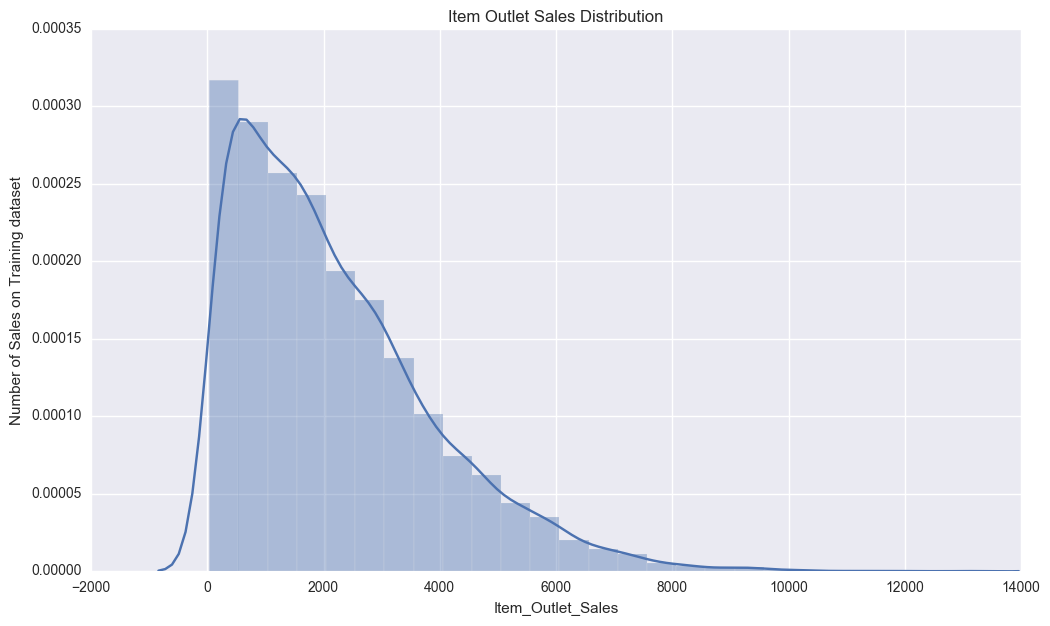

In [7]:
plt.figure( figsize=(12, 7))
plt.xlabel( 'Value of the Outlet Sales' )
plt.ylabel( 'Number of Sales on Training dataset' )
plt.title( 'Item Outlet Sales Distribution' )
#df_train['Item_Outlet_Sales'].hist( bins=26 );
sns.distplot( df_train['Item_Outlet_Sales'], bins=26 )

In [8]:
print( 'Skew is: {}'.format( df_train['Item_Outlet_Sales'].skew() ) )
print( 'Kurtosis: {}'.format( df_train['Item_Outlet_Sales'].kurt() ) )

Skew is: 1.1775306028542798
Kurtosis: 1.6158766814287264


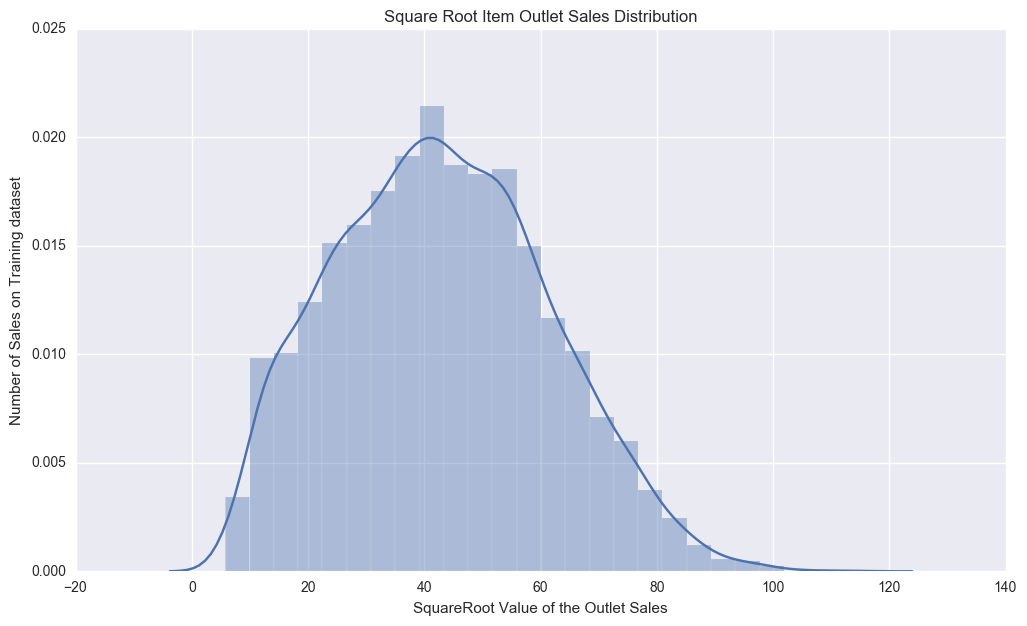

In [9]:
plt.figure( figsize=(12, 7))
a = np.sqrt( df_train['Item_Outlet_Sales'] )
#a.hist( bins=26 );
sns.distplot( a, bins=26 )

plt.xlabel( 'SquareRoot Value of the Outlet Sales' )
plt.ylabel( 'Number of Sales on Training dataset' )
plt.title( 'Square Root Item Outlet Sales Distribution' )

In [10]:
print( 'Skew is: {}'.format( a.skew() ) )
print( 'Kurtosis: {}'.format( a.kurt() ) )

Skew is: 0.23467599347099247
Kurtosis: -0.44929403775144205


### 2.1.2. Numerical Predictors

In [11]:
num_predictors = df_train.select_dtypes( include=[np.number] )
num_predictors.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

In [12]:
# Correlation
corr = num_predictors.corr()
print( corr['Item_Outlet_Sales'].sort_values( ascending=False ) )

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64


#### Item_MRP

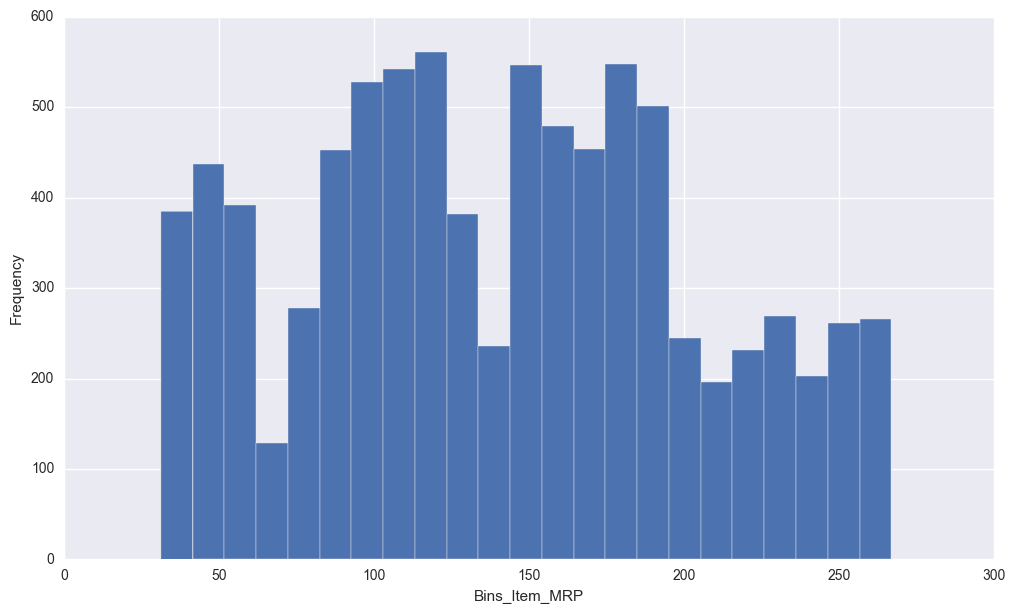

In [13]:
plt.figure( figsize=(12, 7) )
plt.hist( df_train['Item_MRP'], bins=23 );
plt.ylabel( 'Frequency' );
plt.xlabel( 'Bins_Item_MRP')

#### Item_Weight

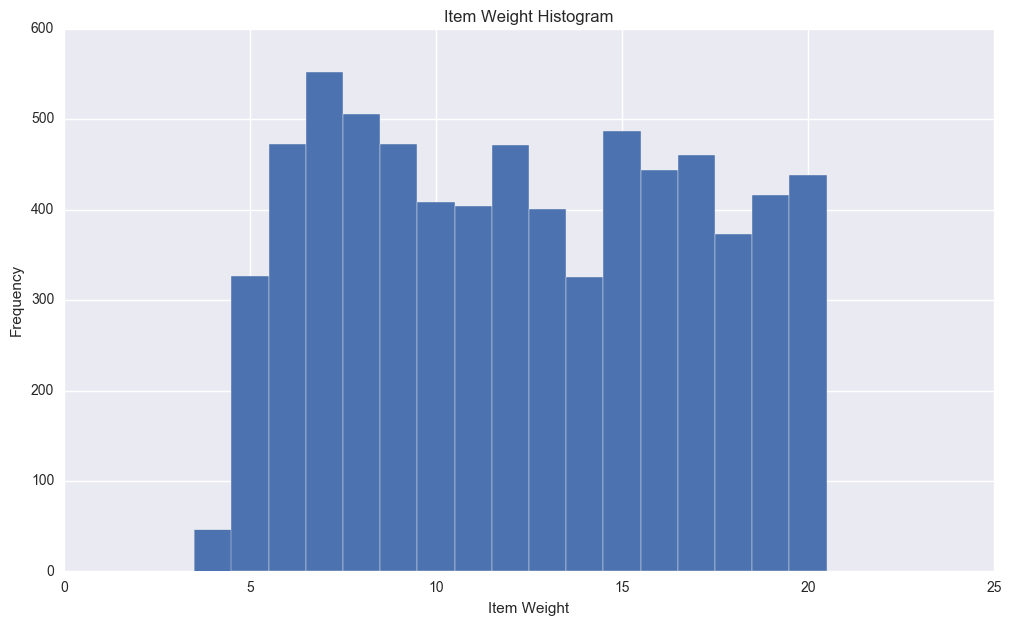

In [14]:
plt.figure( figsize=(12, 7) )
a = df_train['Item_Weight'].dropna()
plt.hist( a, bins=range( 4, 22 ), align='left', rwidth=1 );
plt.xlabel( 'Item Weight' )
plt.ylabel( 'Frequency' )
plt.title( 'Item Weight Histogram' );

### Outlet_Establishment_Year

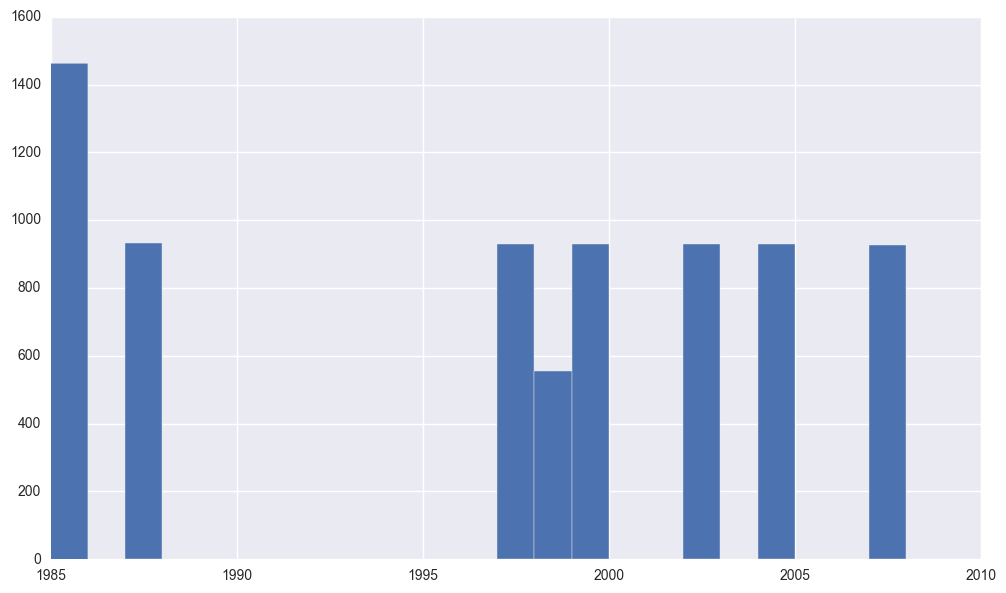

In [15]:
plt.figure( figsize=(12, 7) )
plt.hist( df_train['Outlet_Establishment_Year'], bins=range( 1985, 2009 ) );

### Item_Visibility

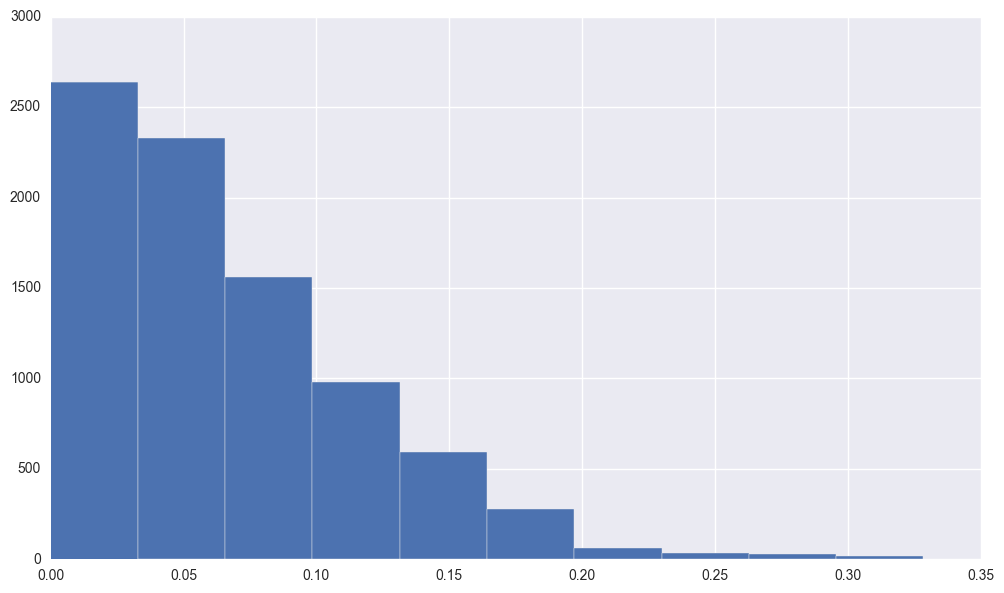

In [16]:
plt.figure( figsize=(12,7) )
plt.hist( df_train['Item_Visibility'] );

### 2.1.3. Categorial Predictors

In [17]:
cat_predictors = df_train.select_dtypes( include=['object'] )
cat_predictors.dtypes

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

### Item_Fat_Content

Apparently, the name of the Fat Content are mispeling for some sales
Low Fat == low fat == LF
Regular == reg

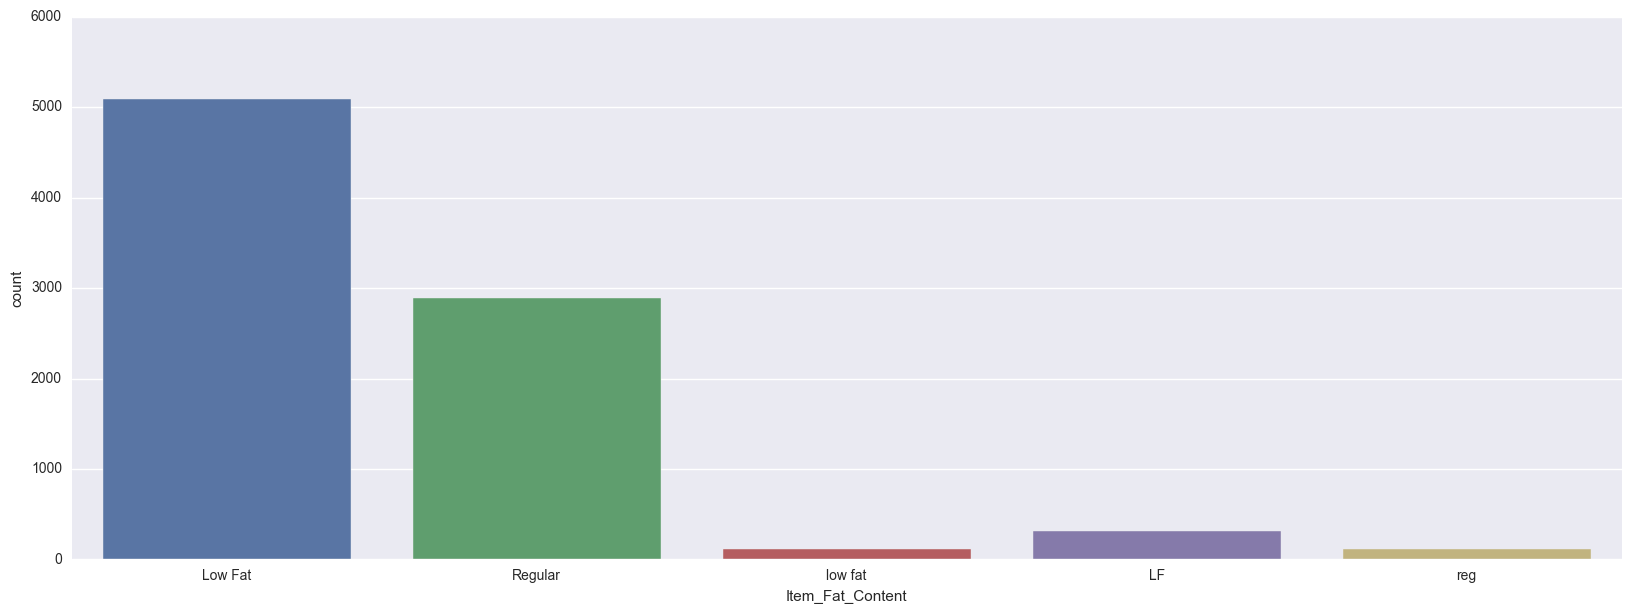

In [18]:
plt.figure( figsize=(20, 7) )
sns.countplot( df_train['Item_Fat_Content'] );

### Item_Type

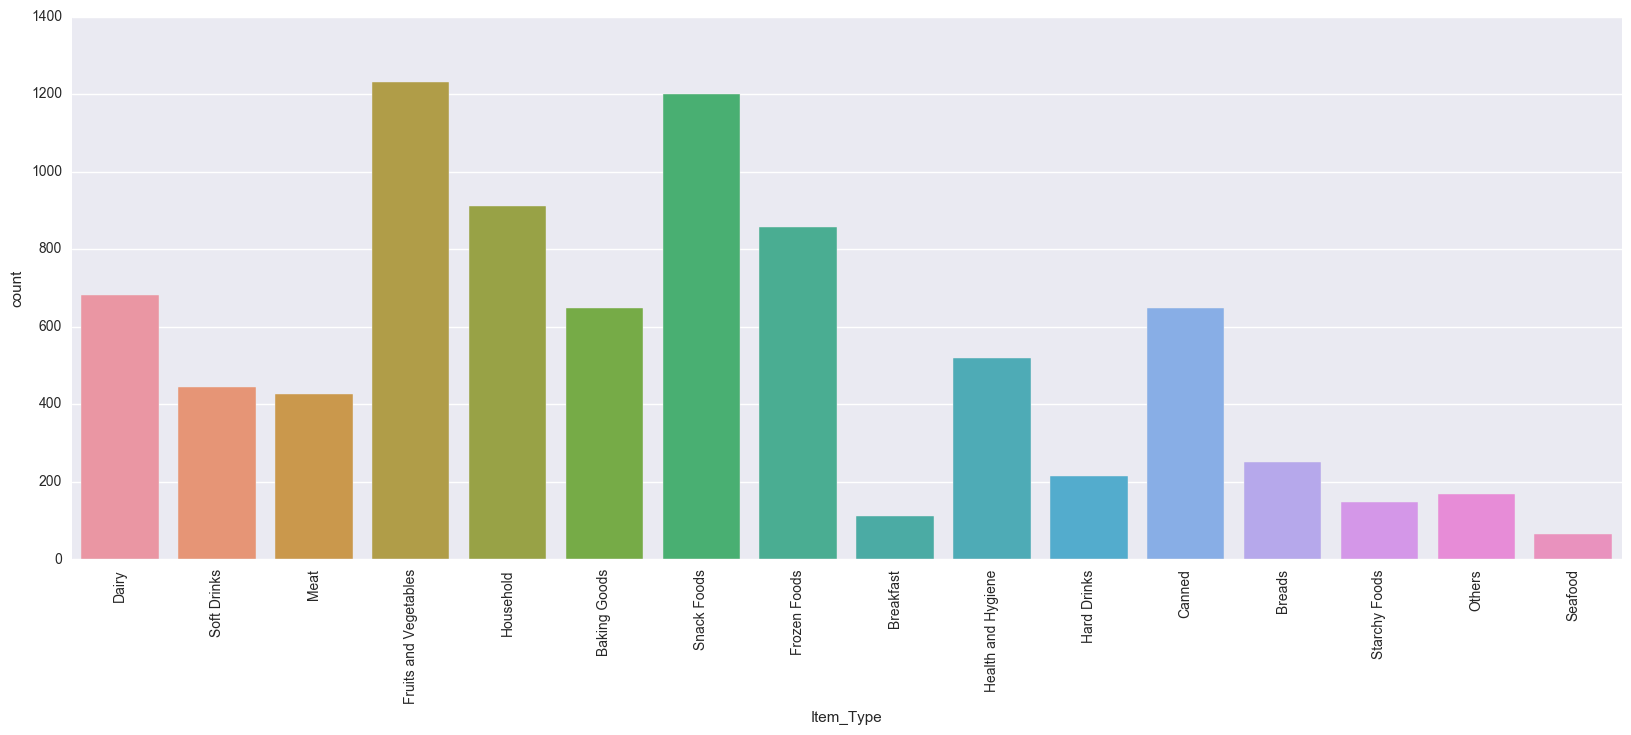

In [20]:
plt.figure( figsize=( 20, 7) )
sns.countplot( df_train['Item_Type'] )
plt.xticks( rotation=90 );

### Outlet_Size

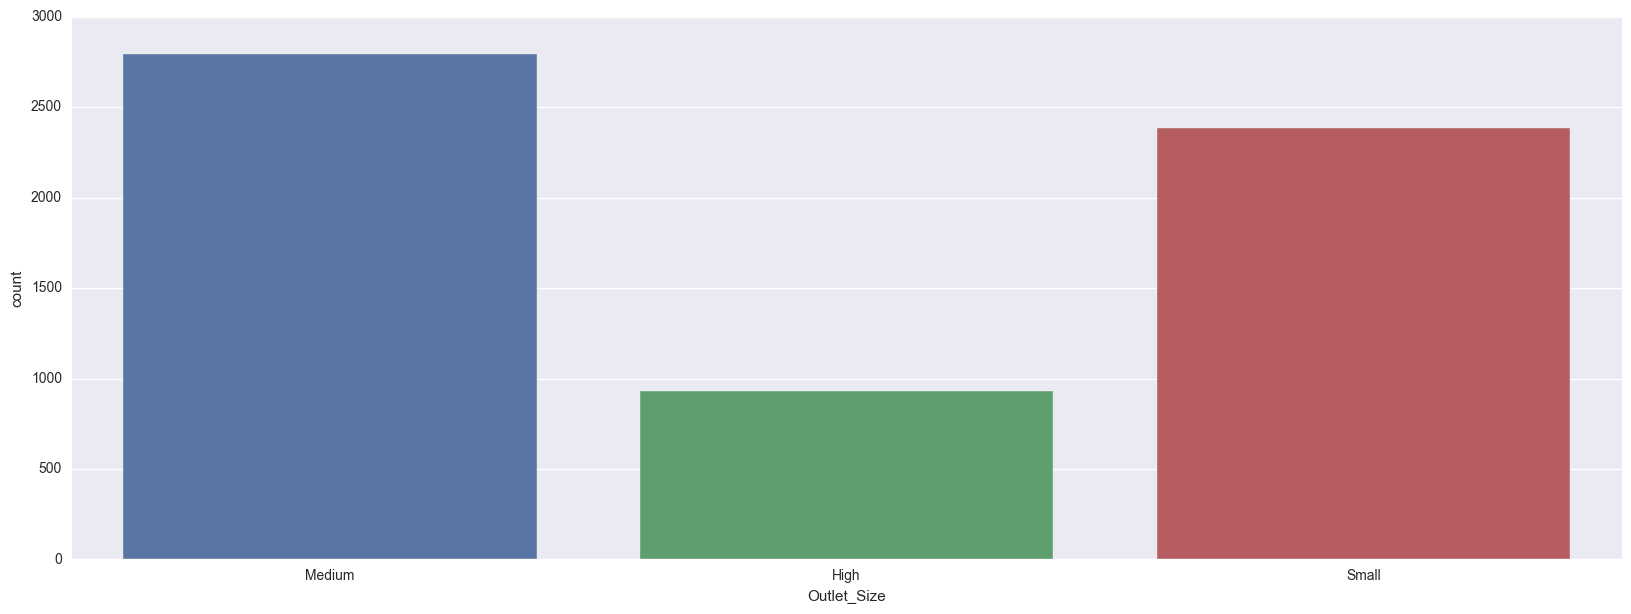

In [191]:
plt.figure( figsize=(20, 7) )
sns.countplot( df_train['Outlet_Size'] )

### Outlet_Location_Type

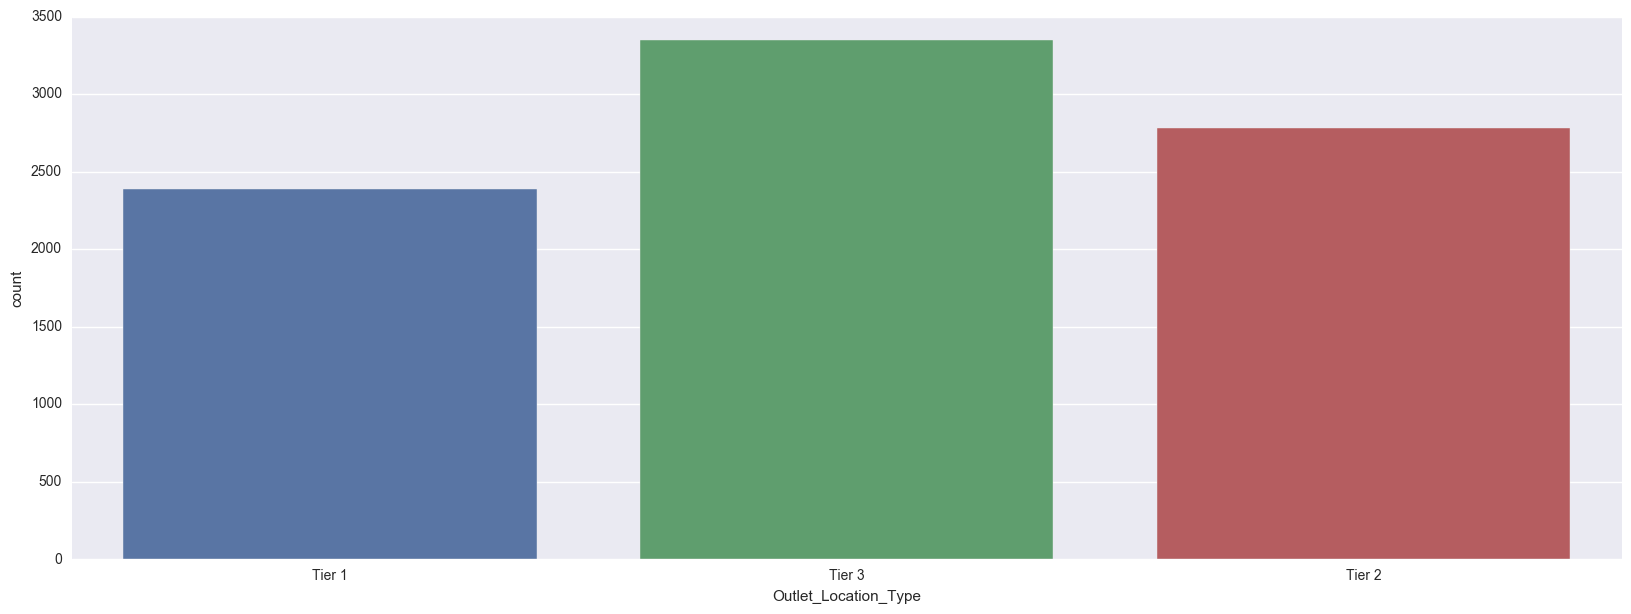

In [193]:
plt.figure( figsize=(20, 7) )
sns.countplot( df_train['Outlet_Location_Type'] );

### Outlet_Type

Supermarket Type2 and Type3 should be merged

In [21]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

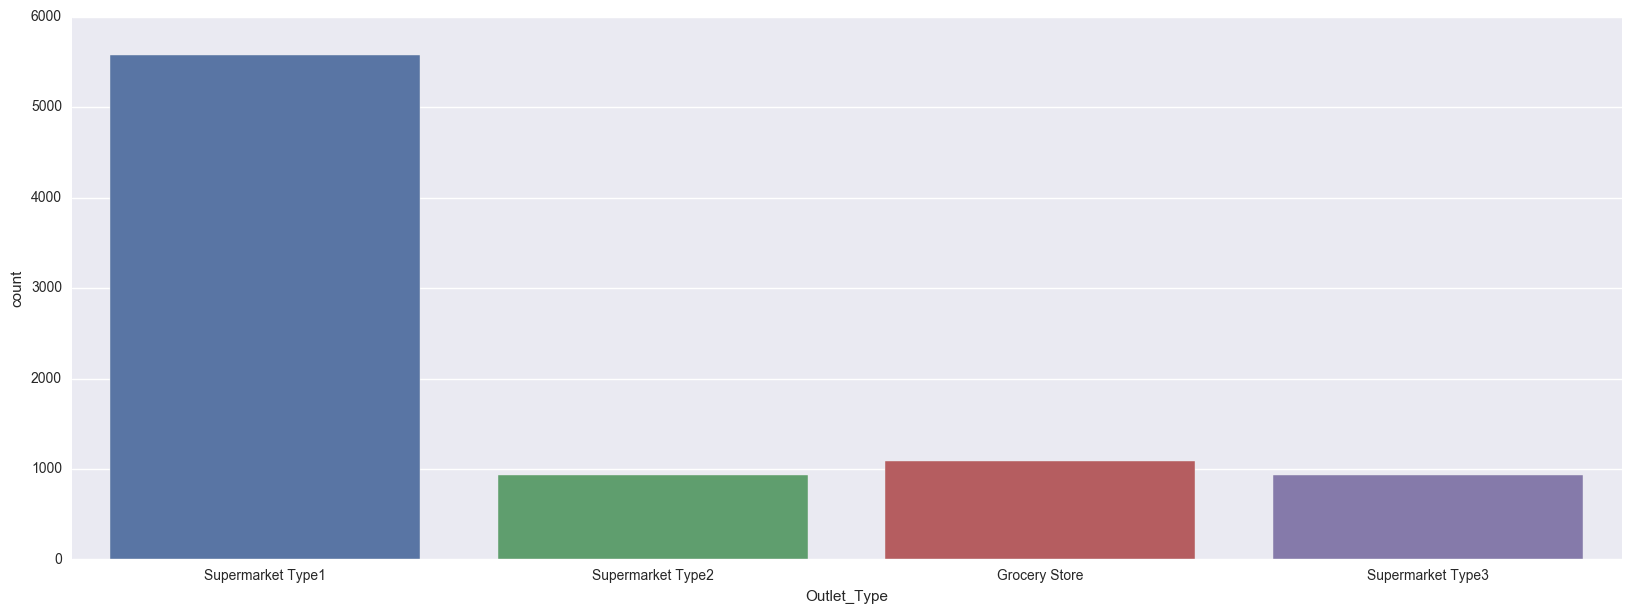

In [194]:
plt.figure( figsize=(20, 7) )
sns.countplot( df_train['Outlet_Type'] );

## 2.2. Bivariate Analysis

### 2.2.2. Numerical Predictors

### 2.2.3. Categorial Predictors

---
# Data Pre-Processing 
---

---
# Feature Engineering
---

---
# Feature Transformation
---

---
# Modeling
---

---
# Hyperparameter tuning
---

---
# Ensembling
---